In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


In [4]:
df=pd.read_csv(r"C:\Users\DELL\Documents\python_class_it\Projects\Match Prediction\readingmatch_stats.csv",index_col=0)
df.head(1)

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,Tim Robinson,Match Report,18,5,14.8,0.0,0,0,2025,Liverpool


In [5]:
df.duplicated()

Date
2024-08-17    False
2024-08-25    False
2024-09-01    False
2024-09-14    False
2024-09-21    False
              ...  
2024-08-31    False
2024-09-15    False
2024-09-21    False
2024-09-28    False
2024-10-05    False
Length: 280, dtype: bool

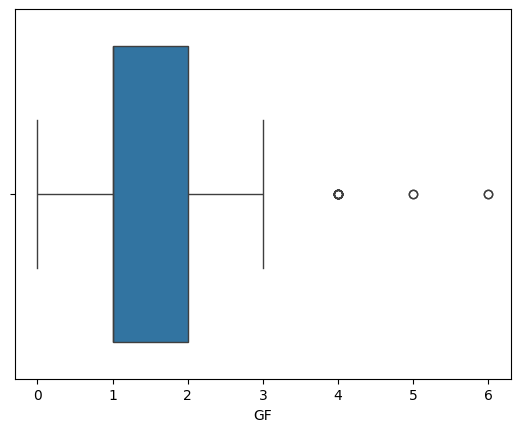

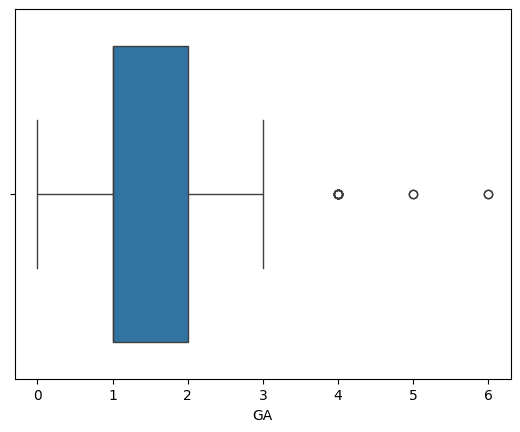

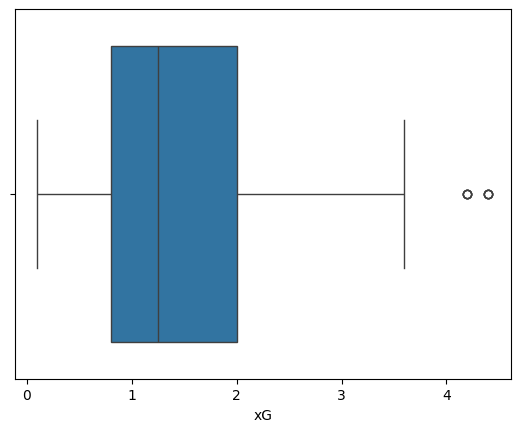

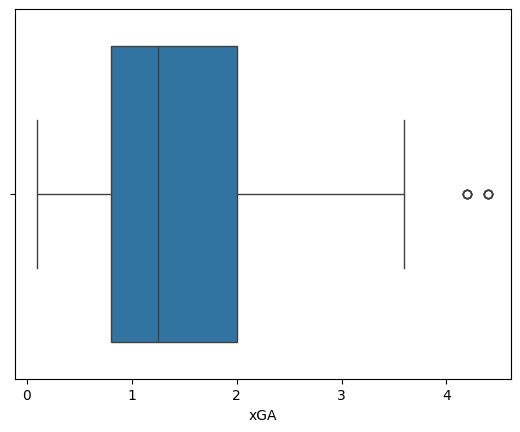

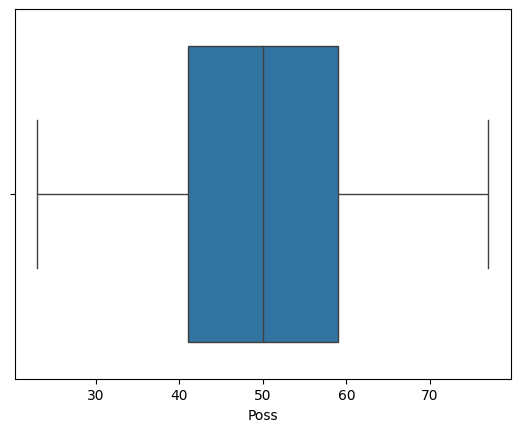

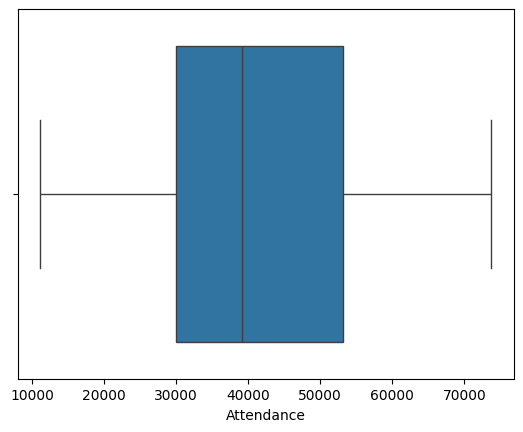

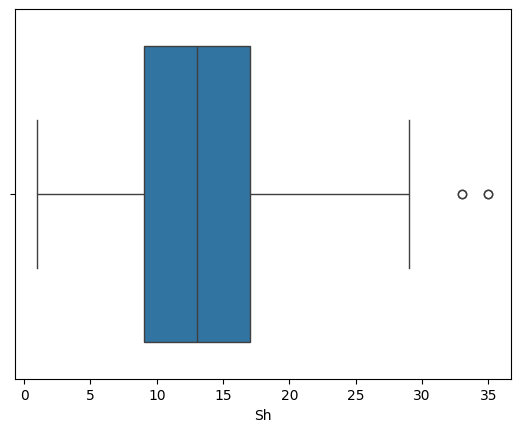

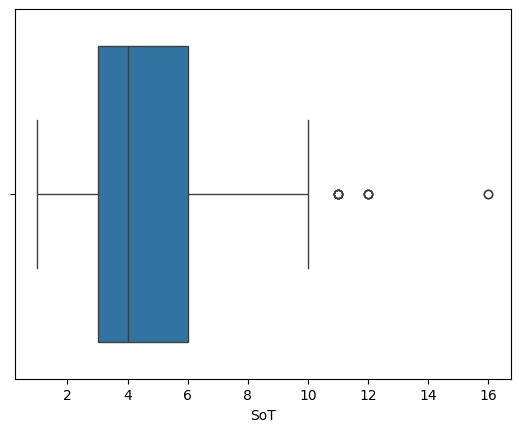

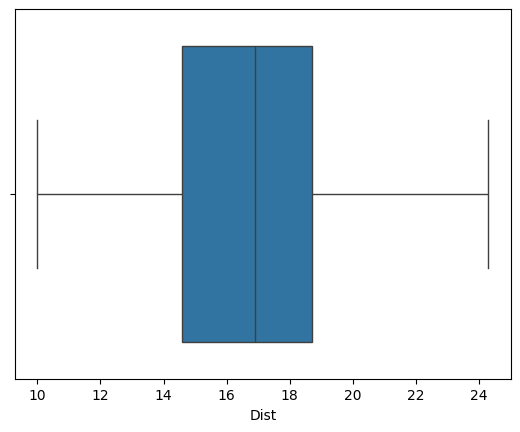

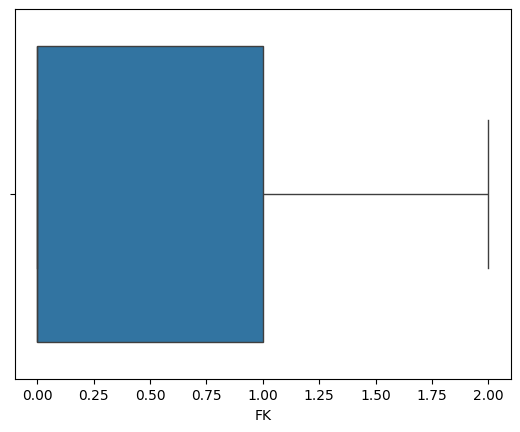

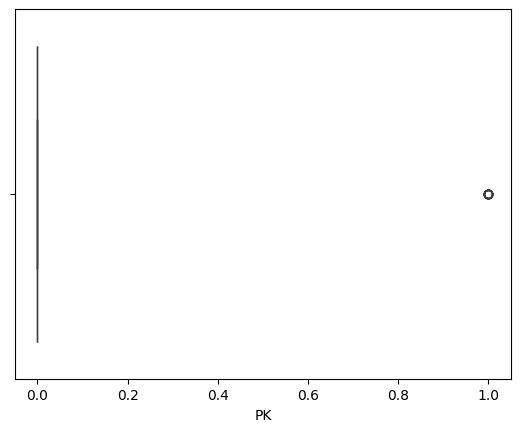

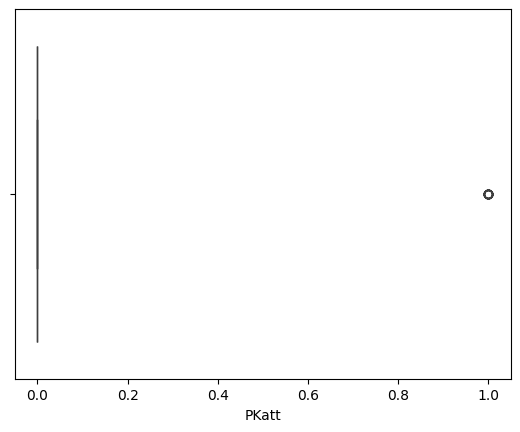

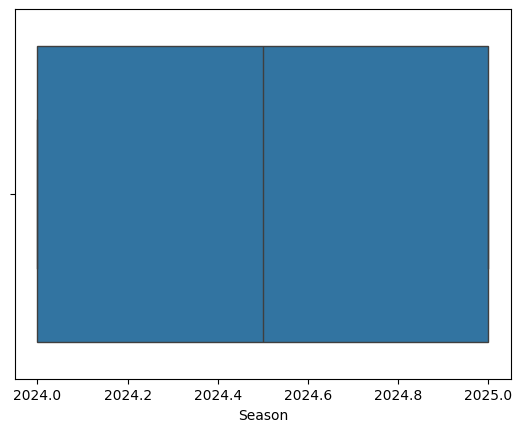

In [6]:
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [7]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-17,0,0,0,2,0,2,2.0,0.0,9,2.6,...,18,0,18,5,14.8,0.0,0,0,2025,11
2024-08-25,5,0,1,3,1,2,2.0,0.0,3,2.5,...,17,0,19,8,13.6,1.0,0,0,2025,11
2024-09-01,4,0,2,3,0,2,3.0,0.0,13,1.8,...,1,0,11,3,13.4,0.0,0,0,2025,11
2024-09-14,3,0,3,2,1,1,0.0,1.0,15,0.9,...,11,0,14,5,14.9,0.0,0,0,2025,11
2024-09-21,3,0,4,2,1,2,3.0,0.0,2,2.0,...,19,0,19,12,16.6,0.0,0,0,2025,11


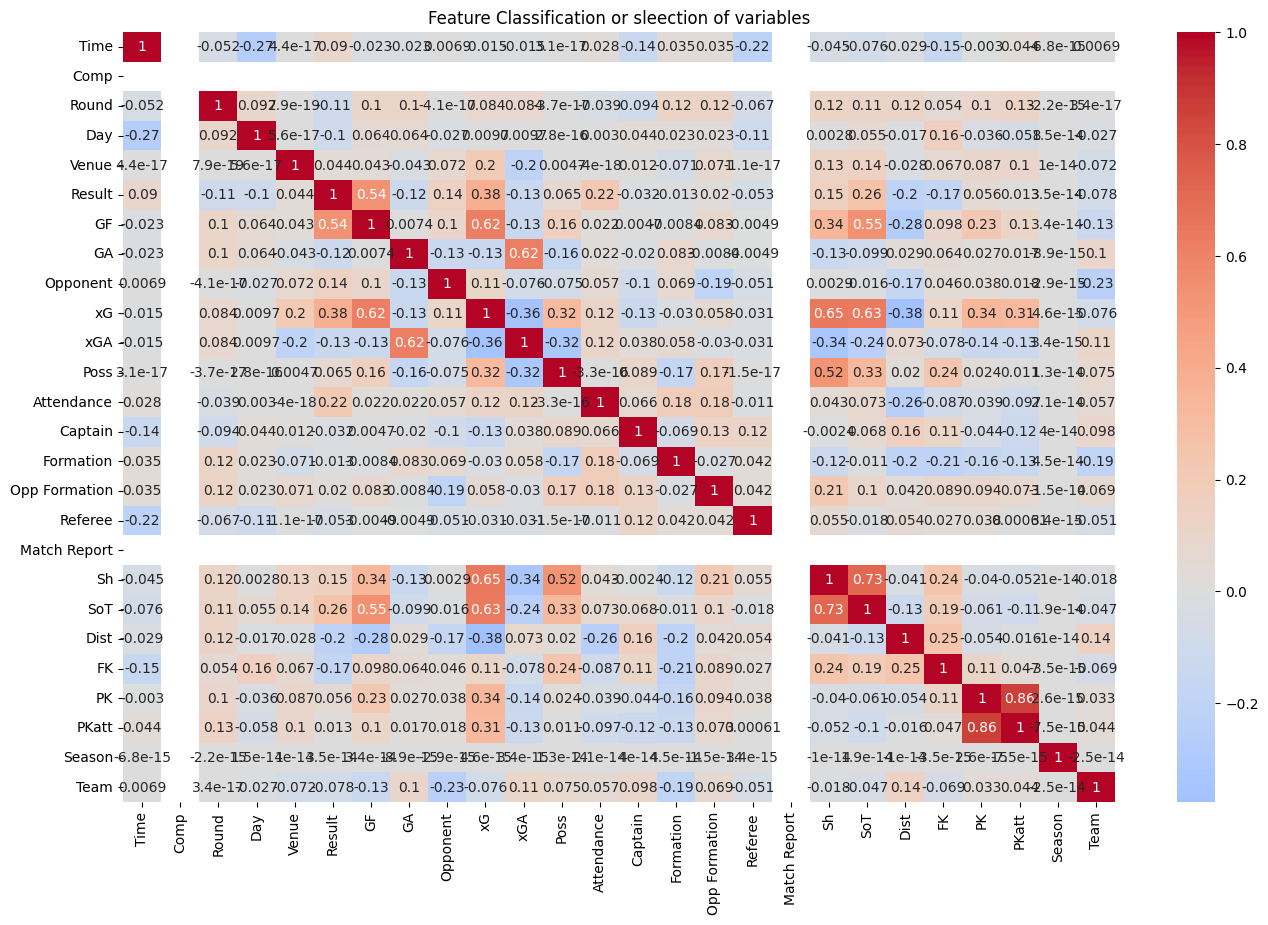

Unique features with Correlation Above 0.5:{'PK', 'Sh', 'GA', 'Result', 'Poss', 'GF', 'xGA', 'xG', 'PKatt', 'SoT'}


In [8]:
#when looking for correlation for the above
corr_matrix=df.corr()

##plot the heatmap
plt.rcParams["figure.figsize"]=[16,10]
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0)
plt.title("Feature Classification or sleection of variables")
plt.show()


#setting threshold is one of the most important things so thst your model willnot predict basically on one features or the highest feature 
#it wiill also be able to identify different features incase there is limited or a particular feature is not available
#it will be able to work on diffferent features to predict well 

threshold=0.5


## identify the pairs of features with correlation above tthe threshold
high_corr_feat=[(feature,other_feature)
               for feature in corr_matrix.columns
               for other_feature in corr_matrix.columns
               if feature != other_feature and abs(corr_matrix.loc[feature,other_feature]) > threshold]
high_corr_set=set([item for sublist in high_corr_feat for item in sublist])
print(f"Unique features with Correlation Above {threshold}:{high_corr_set}")



In [9]:
df2=df.copy()

In [10]:
df2.columns

Index(['Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [11]:
df2=df[["GF","Round","xGA","Poss","SoT","Sh","GA","xG","Result"]]
df2.head()

,GF,Round,xGA,Poss,SoT,Sh,GA,xG,Result
Date,,,,,,,,,
2024-08-17,2.0,0,0.5,62.0,5,18,0.0,2.6,2
2024-08-25,2.0,1,0.5,62.0,8,19,0.0,2.5,2
2024-09-01,3.0,2,1.4,47.0,3,11,0.0,1.8,2
2024-09-14,0.0,3,0.4,68.0,5,14,1.0,0.9,1
2024-09-21,3.0,4,1.1,58.0,12,19,0.0,2.0,2


In [14]:
x=df2.drop(["GA","GF"],axis=1)
y=df2[["GA","GF"]]

In [15]:
x.head()

,Round,xGA,Poss,SoT,Sh,xG,Result
Date,,,,,,,
2024-08-17,0,0.5,62.0,5,18,2.6,2
2024-08-25,1,0.5,62.0,8,19,2.5,2
2024-09-01,2,1.4,47.0,3,11,1.8,2
2024-09-14,3,0.4,68.0,5,14,0.9,1
2024-09-21,4,1.1,58.0,12,19,2.0,2


In [16]:
y.head()

,GA,GF
Date,,
2024-08-17,0.0,2.0
2024-08-25,0.0,2.0
2024-09-01,0.0,3.0
2024-09-14,1.0,0.0
2024-09-21,0.0,3.0


In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [18]:
xtrain.shape

(224, 7)

In [19]:
xtest.shape

(56, 7)

In [20]:
from sklearn.pipeline import Pipeline
rod=Pipeline([("Scalar",StandardScaler()),("Regression",LinearRegression())])


In [21]:
from sklearn.pipeline import Pipeline
Rad=Pipeline([("Scalar",StandardScaler()),("Regression",RandomForestRegressor())])


In [22]:
from sklearn.pipeline import Pipeline
Des=Pipeline([("Scalar",StandardScaler()),("Regression",DecisionTreeRegressor(min_samples_split=5,min_samples_leaf=1,max_features=None,max_depth=10))])

In [23]:
rod.fit(xtrain,ytrain)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('Regression', LinearRegression())])

In [24]:
pred1=rod.predict(xtest)
pred1

array([[1.4735345 , 0.87001388],
       [0.86175793, 0.66421293],
       [1.77679672, 1.33651259],
       [1.06372155, 0.15555216],
       [0.57513556, 1.95303592],
       [1.18400779, 0.43687071],
       [0.57513556, 1.95303592],
       [2.49336873, 0.98796966],
       [0.88112284, 1.2949463 ],
       [1.10590974, 2.12434694],
       [1.54206375, 1.48336195],
       [1.87180437, 0.53948491],
       [1.05096955, 1.17170492],
       [1.09924059, 0.24526316],
       [0.34777212, 1.48201105],
       [1.37748785, 1.3140978 ],
       [1.09924059, 0.24526316],
       [1.5213832 , 0.80856049],
       [1.87180437, 0.53948491],
       [1.449558  , 0.96573405],
       [2.2001284 , 1.87983198],
       [1.18868501, 1.64111504],
       [1.43408492, 2.84176684],
       [2.10193323, 1.81028526],
       [2.20406711, 1.10239321],
       [1.00127668, 3.94598191],
       [2.08547853, 1.54501954],
       [0.84258294, 4.45133491],
       [0.4303423 , 0.97357337],
       [2.49336873, 0.98796966],
       [1.

In [25]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 0.681044561149255
MAPE 725894609716975.2
MSE 0.8214996175935536
R2 SCORE 0.3844554442389059


In [26]:
Rad.fit(xtrain,ytrain)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('Regression', RandomForestRegressor())])

In [27]:
pred2=Rad.predict(xtest)
pred2

array([[1.97, 0.89],
       [1.47, 1.47],
       [2.93, 1.68],
       [0.96, 0.96],
       [0.39, 1.53],
       [1.  , 1.  ],
       [0.39, 1.53],
       [3.09, 0.91],
       [1.44, 1.44],
       [0.79, 1.86],
       [4.86, 1.62],
       [0.96, 0.96],
       [1.27, 0.17],
       [1.74, 0.13],
       [0.04, 2.12],
       [2.12, 0.98],
       [1.74, 0.13],
       [1.13, 1.13],
       [0.96, 0.96],
       [2.68, 0.83],
       [2.98, 1.64],
       [0.95, 0.95],
       [1.01, 3.1 ],
       [1.15, 2.49],
       [2.28, 0.82],
       [1.32, 3.97],
       [2.94, 0.92],
       [1.71, 3.88],
       [1.38, 0.15],
       [3.09, 0.91],
       [3.04, 0.3 ],
       [0.97, 0.97],
       [0.65, 1.85],
       [1.81, 0.71],
       [1.04, 2.98],
       [0.3 , 2.99],
       [0.21, 1.25],
       [2.84, 0.23],
       [1.13, 0.08],
       [0.09, 1.23],
       [0.43, 1.61],
       [0.16, 1.17],
       [0.12, 1.41],
       [0.85, 3.48],
       [1.43, 1.43],
       [0.91, 2.36],
       [0.93, 2.3 ],
       [1.55,

In [28]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 0.2971428571428571
MAPE 158832308286727.44
MSE 0.1927732142857143
R2 SCORE 0.8459822454676178


In [29]:
Des.fit(xtrain,ytrain)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('Regression',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=5))])

In [30]:
pred3=Des.fit(xtrain,ytrain)
pred3

Pipeline(steps=[('Scalar', StandardScaler()),
                ('Regression',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=5))])

In [31]:
pred3=Des.predict(xtest)

In [32]:
print("MAE",mean_absolute_error(ytest,pred3))
print("MAPE",mean_absolute_percentage_error(ytest,pred3))
print("MSE",mean_squared_error(ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 0.22023809523809523
MAPE 50263388698331.53
MSE 0.2255704365079365
R2 SCORE 0.8175358823381986


In [33]:
import pickle

with open('scoresmodel.pkl', 'wb') as file:
    pickle.dump(Rad, file)